In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

In [3]:
data = pd.read_csv('daily_data.csv')
data = data[data.columns[data.columns != 'Unnamed: 0']]
numerical_data = data[data.columns[data.columns != 'unique_dates']]
numerical_data /= numerical_data.max()

In [4]:
data

,unique_dates,unique_users,unique_meals,Protein_average_sum,Calories_average_sum,Sodium_average_sum,Sugar_average_sum,Fat_average_sum,Carbs_average_sum,Fiber_average_sum,Protein_average_dif,Calories_average_dif,Sodium_average_dif,Sugar_average_dif,Fat_average_dif,Carbs_average_dif,Fiber_average_dif
0,2014-09-14,56,58,6.245841,136.231054,215.721612,6.989051,5.641176,13.127119,1.345013,58.267857,693.482143,676.178571,21.946429,26.785714,87.678571,10.142857
1,2014-09-15,280,223,6.949937,126.001244,181.622967,5.273216,4.787349,12.824839,1.381949,51.350000,596.467857,651.171429,25.589286,26.821429,79.975000,7.239286
2,2014-09-16,279,246,7.175121,128.075840,183.375952,4.897581,4.616700,13.330020,1.502986,47.451613,553.010753,644.118280,22.254480,23.992832,75.258065,6.917563
3,2014-09-17,274,253,7.279987,132.674687,185.938706,4.899329,4.967643,13.420027,1.529973,50.481752,550.788321,648.401460,22.259124,25.536496,71.854015,7.737226
4,2014-09-18,382,328,6.989593,127.458098,183.888365,4.790323,4.833859,13.187240,1.643258,47.141361,519.246073,640.293194,19.709424,24.845550,69.243455,7.638743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,2015-04-05,515,271,6.921683,141.279944,187.666964,4.733155,5.415024,13.658904,1.437257,58.079612,660.137864,826.499029,23.683495,27.052427,89.520388,7.452427
204,2015-04-06,574,341,6.846955,117.933080,165.196948,4.474334,4.511377,12.123652,1.569868,53.689895,643.672474,736.179443,21.113240,25.165505,80.905923,6.916376
205,2015-04-07,351,223,6.975521,117.602647,163.284166,4.382934,4.545600,12.103809,1.720886,49.811966,610.327635,808.908832,21.458689,25.279202,83.658120,6.381766
206,2015-04-08,132,90,6.832445,116.566238,157.385554,4.169051,4.736802,11.833466,1.832423,54.030303,708.477273,826.106061,21.257576,25.803030,86.848485,5.659091


In [5]:
data.set_index(['unique_dates'])

,unique_users,unique_meals,Protein_average_sum,Calories_average_sum,Sodium_average_sum,Sugar_average_sum,Fat_average_sum,Carbs_average_sum,Fiber_average_sum,Protein_average_dif,Calories_average_dif,Sodium_average_dif,Sugar_average_dif,Fat_average_dif,Carbs_average_dif,Fiber_average_dif
unique_dates,,,,,,,,,,,,,,,,
2014-09-14,56,58,6.245841,136.231054,215.721612,6.989051,5.641176,13.127119,1.345013,58.267857,693.482143,676.178571,21.946429,26.785714,87.678571,10.142857
2014-09-15,280,223,6.949937,126.001244,181.622967,5.273216,4.787349,12.824839,1.381949,51.350000,596.467857,651.171429,25.589286,26.821429,79.975000,7.239286
2014-09-16,279,246,7.175121,128.075840,183.375952,4.897581,4.616700,13.330020,1.502986,47.451613,553.010753,644.118280,22.254480,23.992832,75.258065,6.917563
2014-09-17,274,253,7.279987,132.674687,185.938706,4.899329,4.967643,13.420027,1.529973,50.481752,550.788321,648.401460,22.259124,25.536496,71.854015,7.737226
2014-09-18,382,328,6.989593,127.458098,183.888365,4.790323,4.833859,13.187240,1.643258,47.141361,519.246073,640.293194,19.709424,24.845550,69.243455,7.638743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-04-05,515,271,6.921683,141.279944,187.666964,4.733155,5.415024,13.658904,1.437257,58.079612,660.137864,826.499029,23.683495,27.052427,89.520388,7.452427
2015-04-06,574,341,6.846955,117.933080,165.196948,4.474334,4.511377,12.123652,1.569868,53.689895,643.672474,736.179443,21.113240,25.165505,80.905923,6.916376
2015-04-07,351,223,6.975521,117.602647,163.284166,4.382934,4.545600,12.103809,1.720886,49.811966,610.327635,808.908832,21.458689,25.279202,83.658120,6.381766


In [6]:
numerical_data.describe()

,unique_users,unique_meals,Protein_average_sum,Calories_average_sum,Sodium_average_sum,Sugar_average_sum,Fat_average_sum,Carbs_average_sum,Fiber_average_sum,Protein_average_dif,Calories_average_dif,Sodium_average_dif,Sugar_average_dif,Fat_average_dif,Carbs_average_dif,Fiber_average_dif
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.623043,0.649316,0.683086,0.653436,0.726000,0.494421,0.541557,0.738894,0.670073,0.425612,0.547457,0.659839,0.369440,0.412504,0.428182,0.579649
std,0.244092,0.228801,0.029405,0.051031,0.049800,0.043487,0.059510,0.042678,0.038650,0.061007,0.064228,0.050759,0.058707,0.074040,0.061540,0.068562
min,0.003752,0.007049,0.629159,0.520599,0.509071,0.408488,0.306246,0.599217,0.591454,0.365153,0.476369,0.583314,0.320733,0.361728,0.381901,0.484711
25%,0.477157,0.520559,0.670219,0.616225,0.690319,0.478166,0.505740,0.710938,0.651608,0.395331,0.507526,0.625778,0.345261,0.380845,0.395952,0.538484
50%,0.642463,0.676692,0.678774,0.643162,0.721782,0.490391,0.526352,0.730930,0.668254,0.411538,0.531797,0.648067,0.359273,0.393701,0.412950,0.569231
75%,0.807603,0.802397,0.691414,0.684545,0.755028,0.503338,0.576787,0.764437,0.678321,0.438132,0.567463,0.683464,0.379115,0.422430,0.438866,0.611976
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
def boxplots(numerical_data):
    fig, axes = plt.subplots(8, 2, figsize=(20, 30))
    i = 0
    j = 0
    for feature in numerical_data.columns.values:
        sns.boxplot(ax=axes[i, j], x=numerical_data[feature])
        if j == 1:
            j = 0
            i += 1
        else:
            j += 1

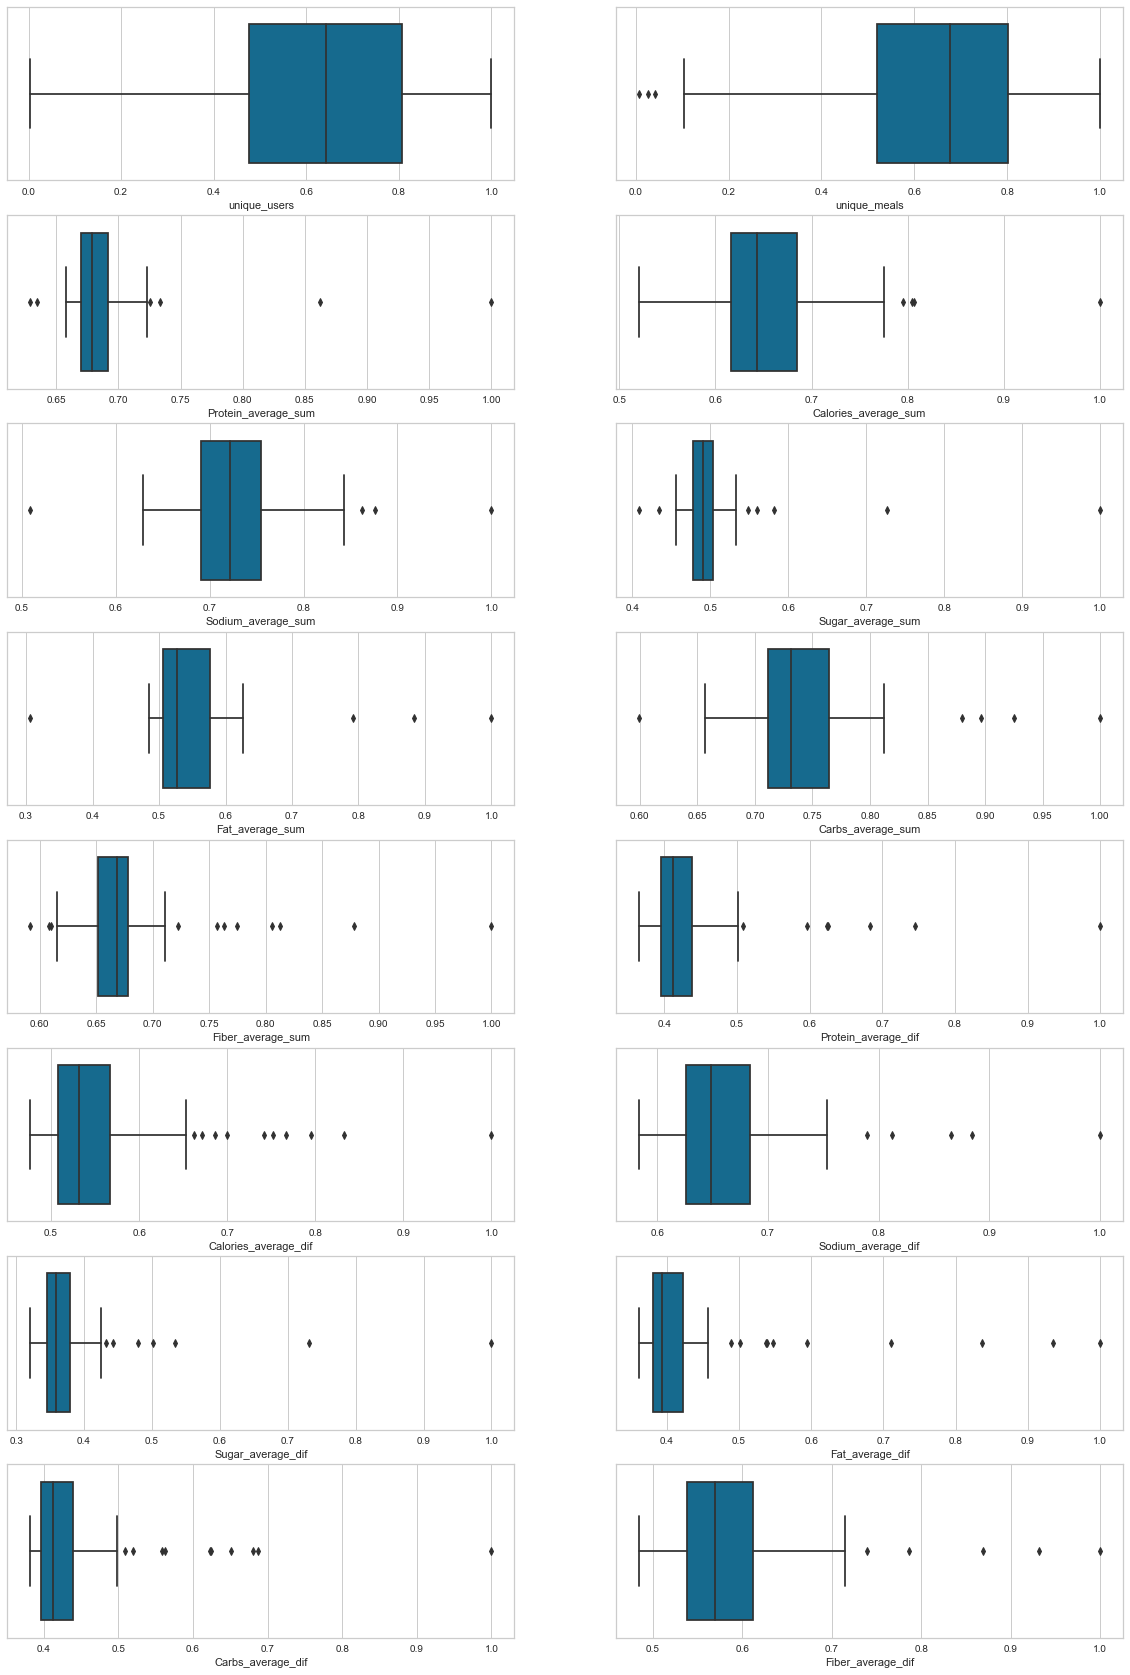

In [8]:
boxplots(numerical_data)

In [9]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) # heuristic 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [10]:
hopkins(numerical_data)

0.8908312316354129

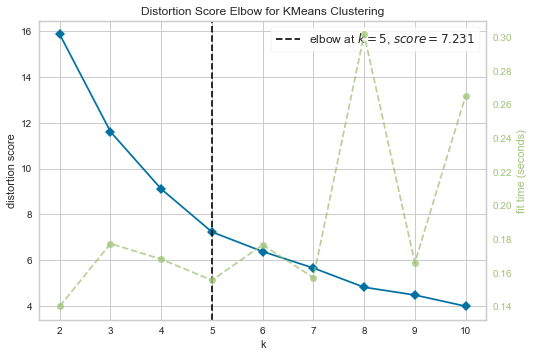

In [11]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=10)
visualizer.fit(numerical_data)
visualizer.show()

In [18]:
km = KMeans(n_clusters = 5)
y = km.fit_predict(numerical_data)

clusters = [[] for _ in range(5)]
for indx, cluster in enumerate(y):
    clusters[cluster].append(indx)

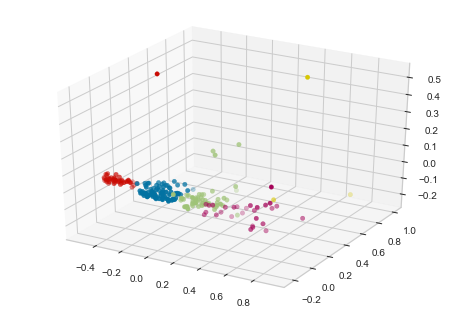

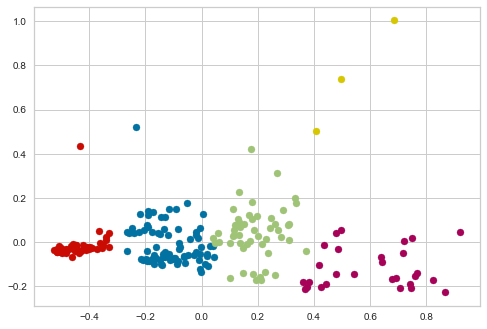

In [19]:
from sklearn.decomposition import PCA
def plot(X, clusters, dimension):
    if dimension == 3:
        ax = plt.figure().gca(projection='3d')
    else:
        ax = plt.figure().gca()
    for i, index in enumerate(clusters):
        point = X[index].T
        ax.scatter(*point)
    plt.show()
    
pca = PCA(n_components=3)
pca_components = pd.DataFrame(pca.fit_transform(numerical_data))
plot(np.asarray(pca_components), clusters, 3)

pca = PCA(n_components=2)
pca_components = pd.DataFrame(pca.fit_transform(numerical_data))
plot(np.asarray(pca_components), clusters, 2)

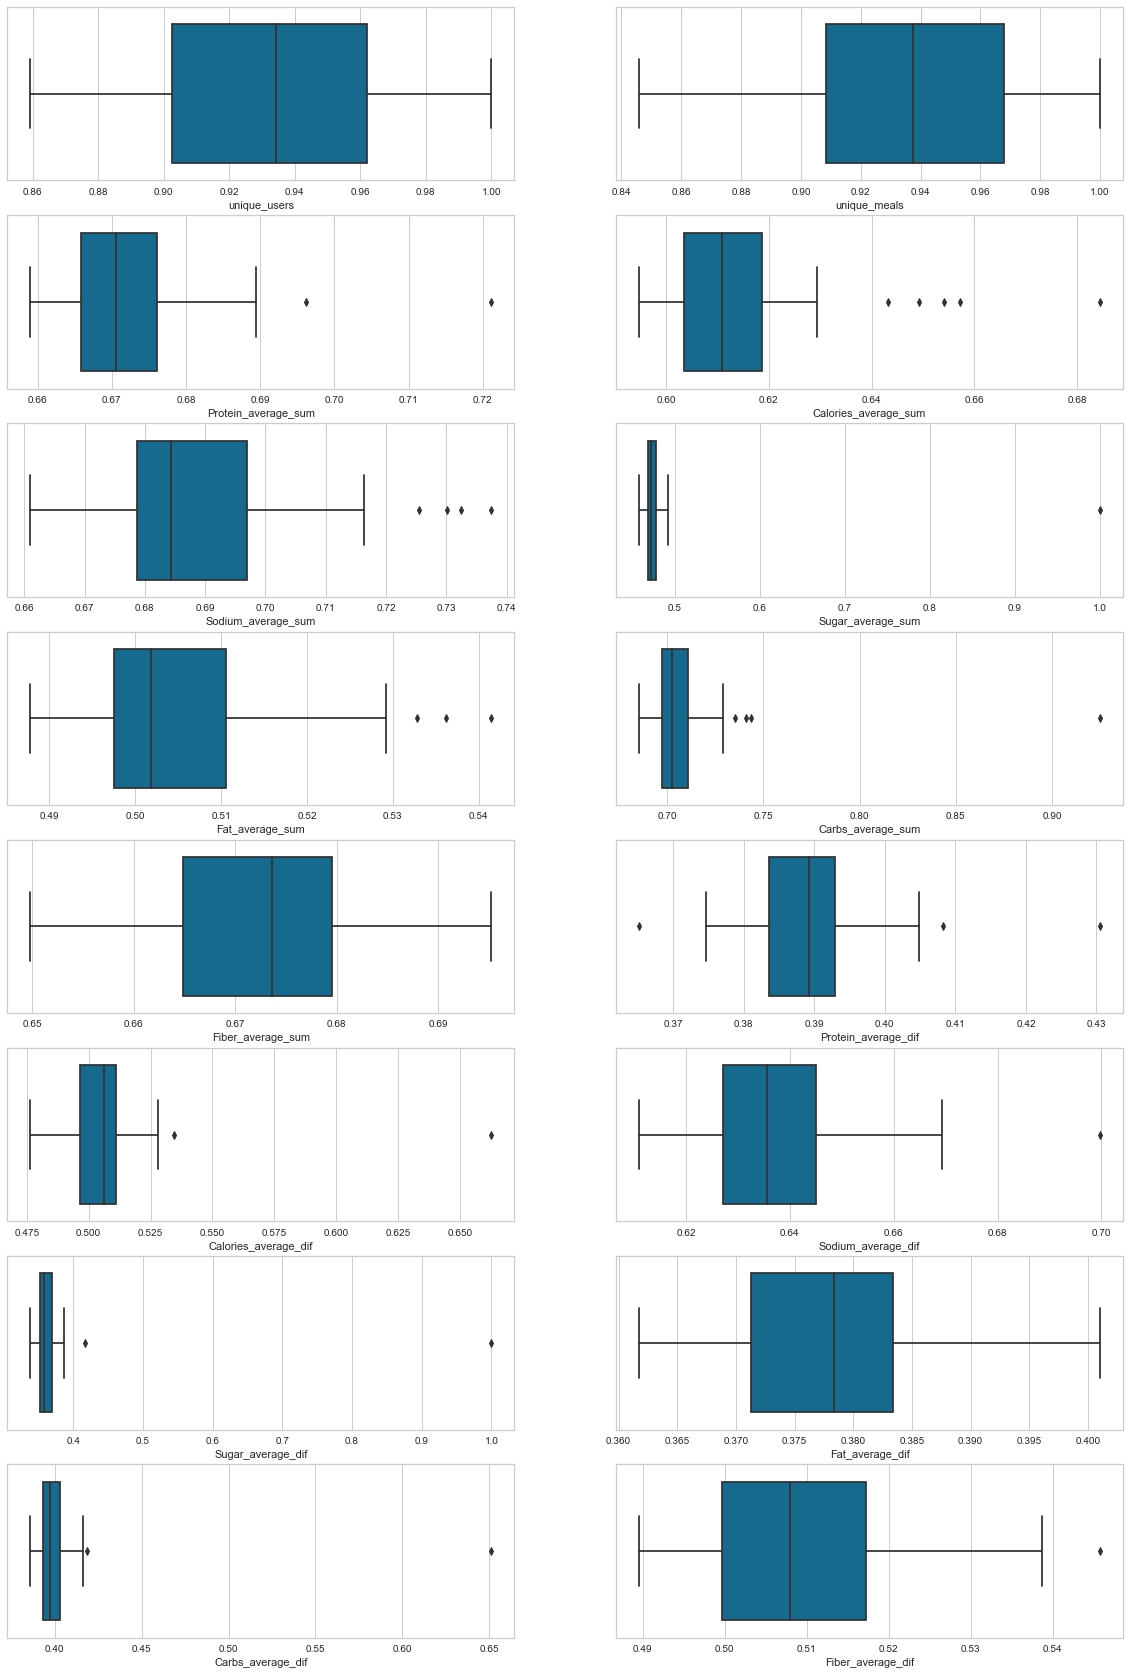

In [14]:
boxplots(numerical_data.loc[clusters[0], :])

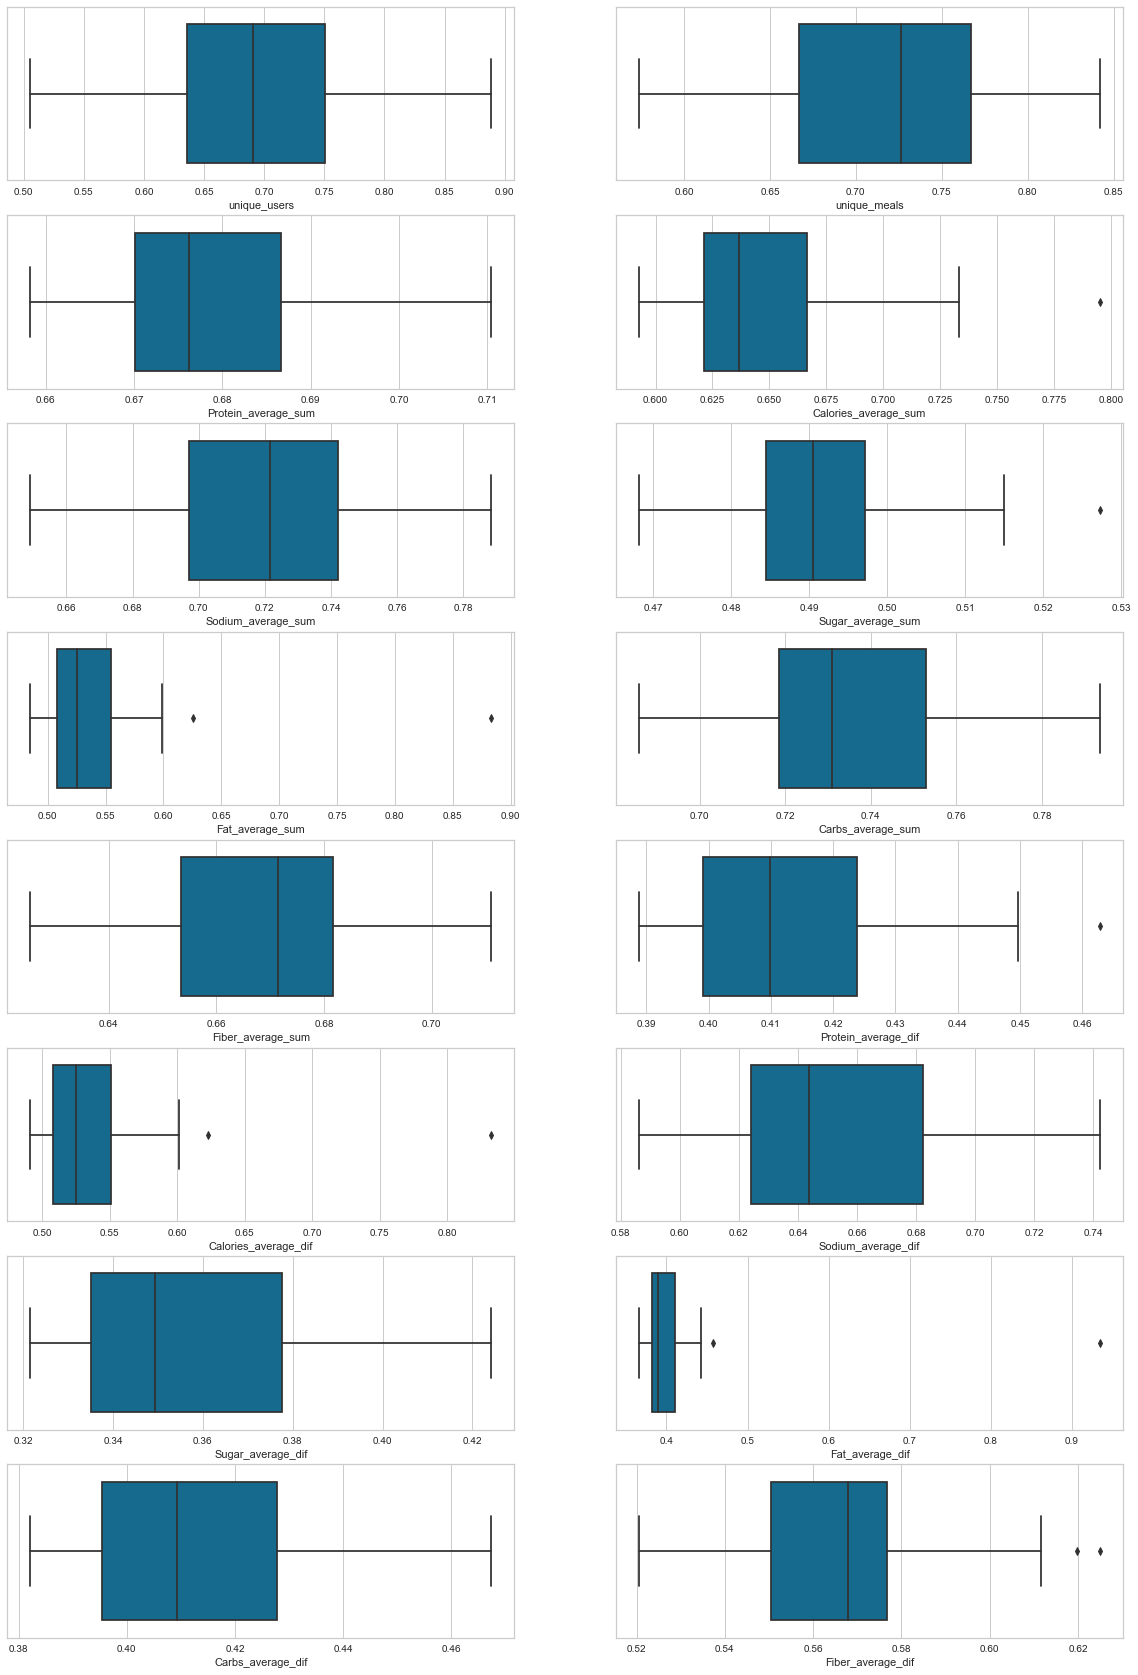

In [15]:
boxplots(numerical_data.loc[clusters[1], :])

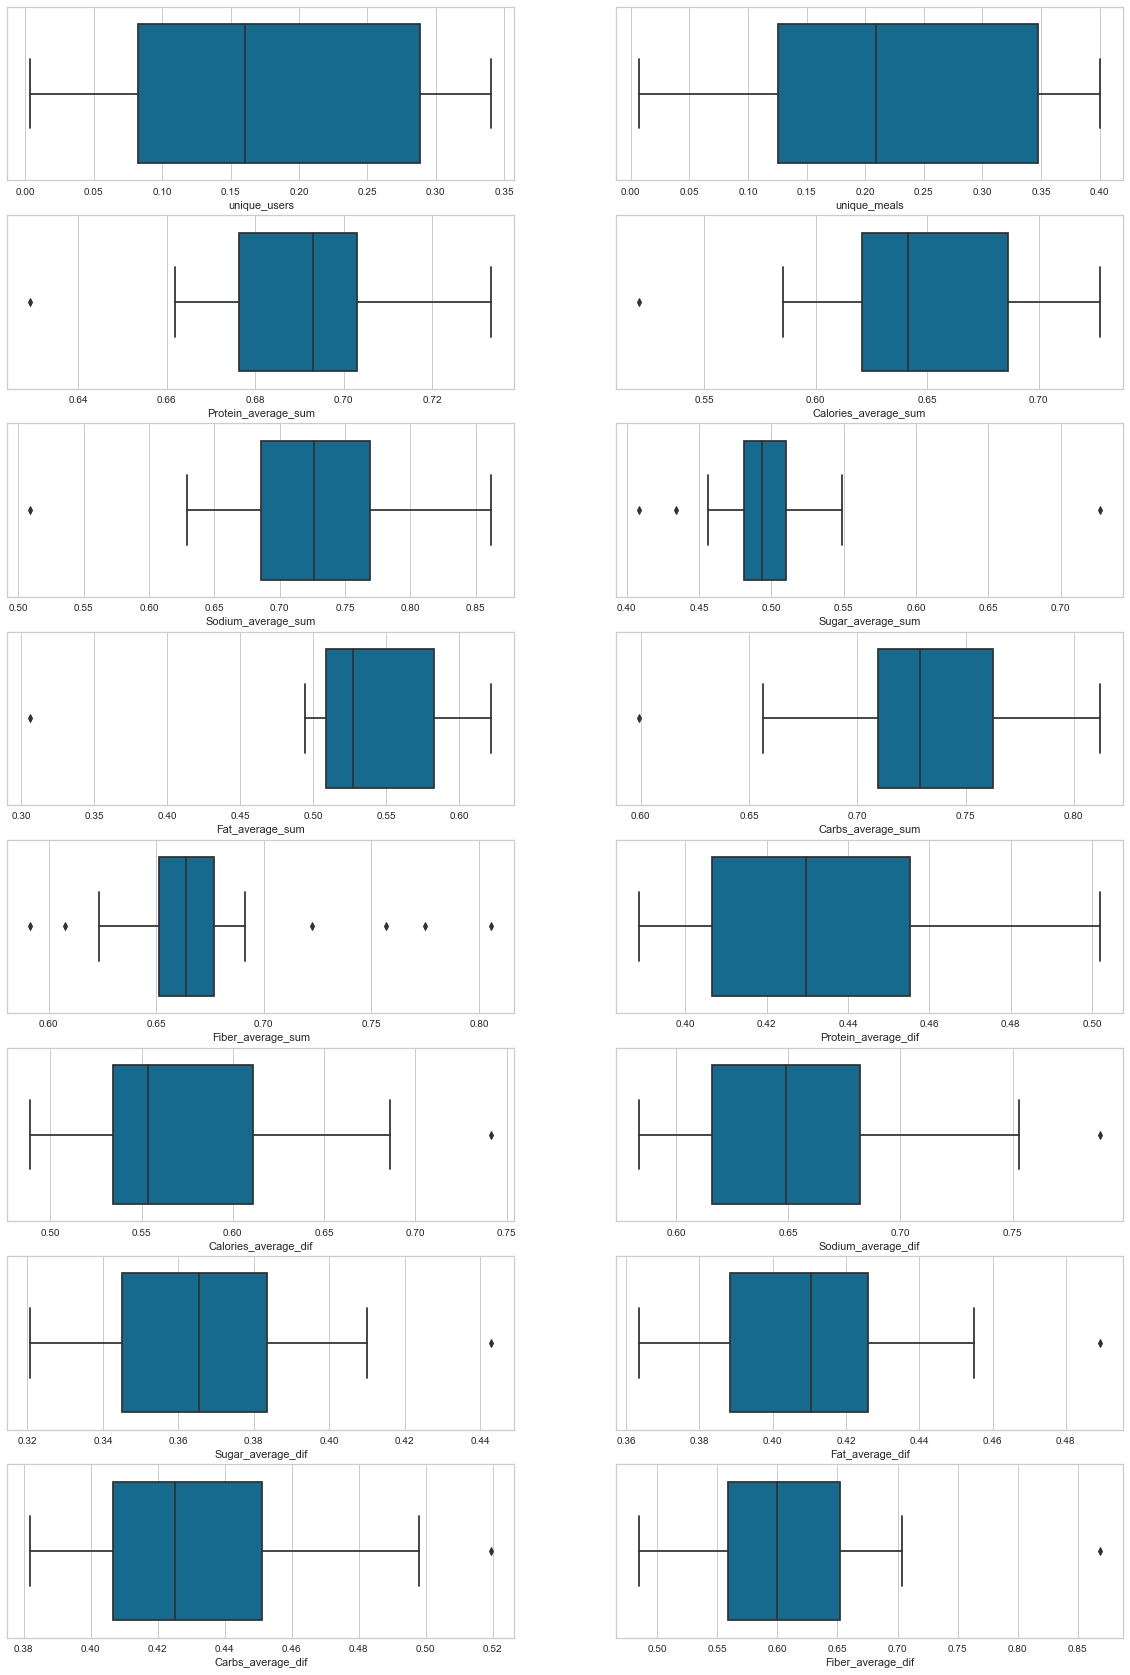

In [16]:
boxplots(numerical_data.loc[clusters[2], :])

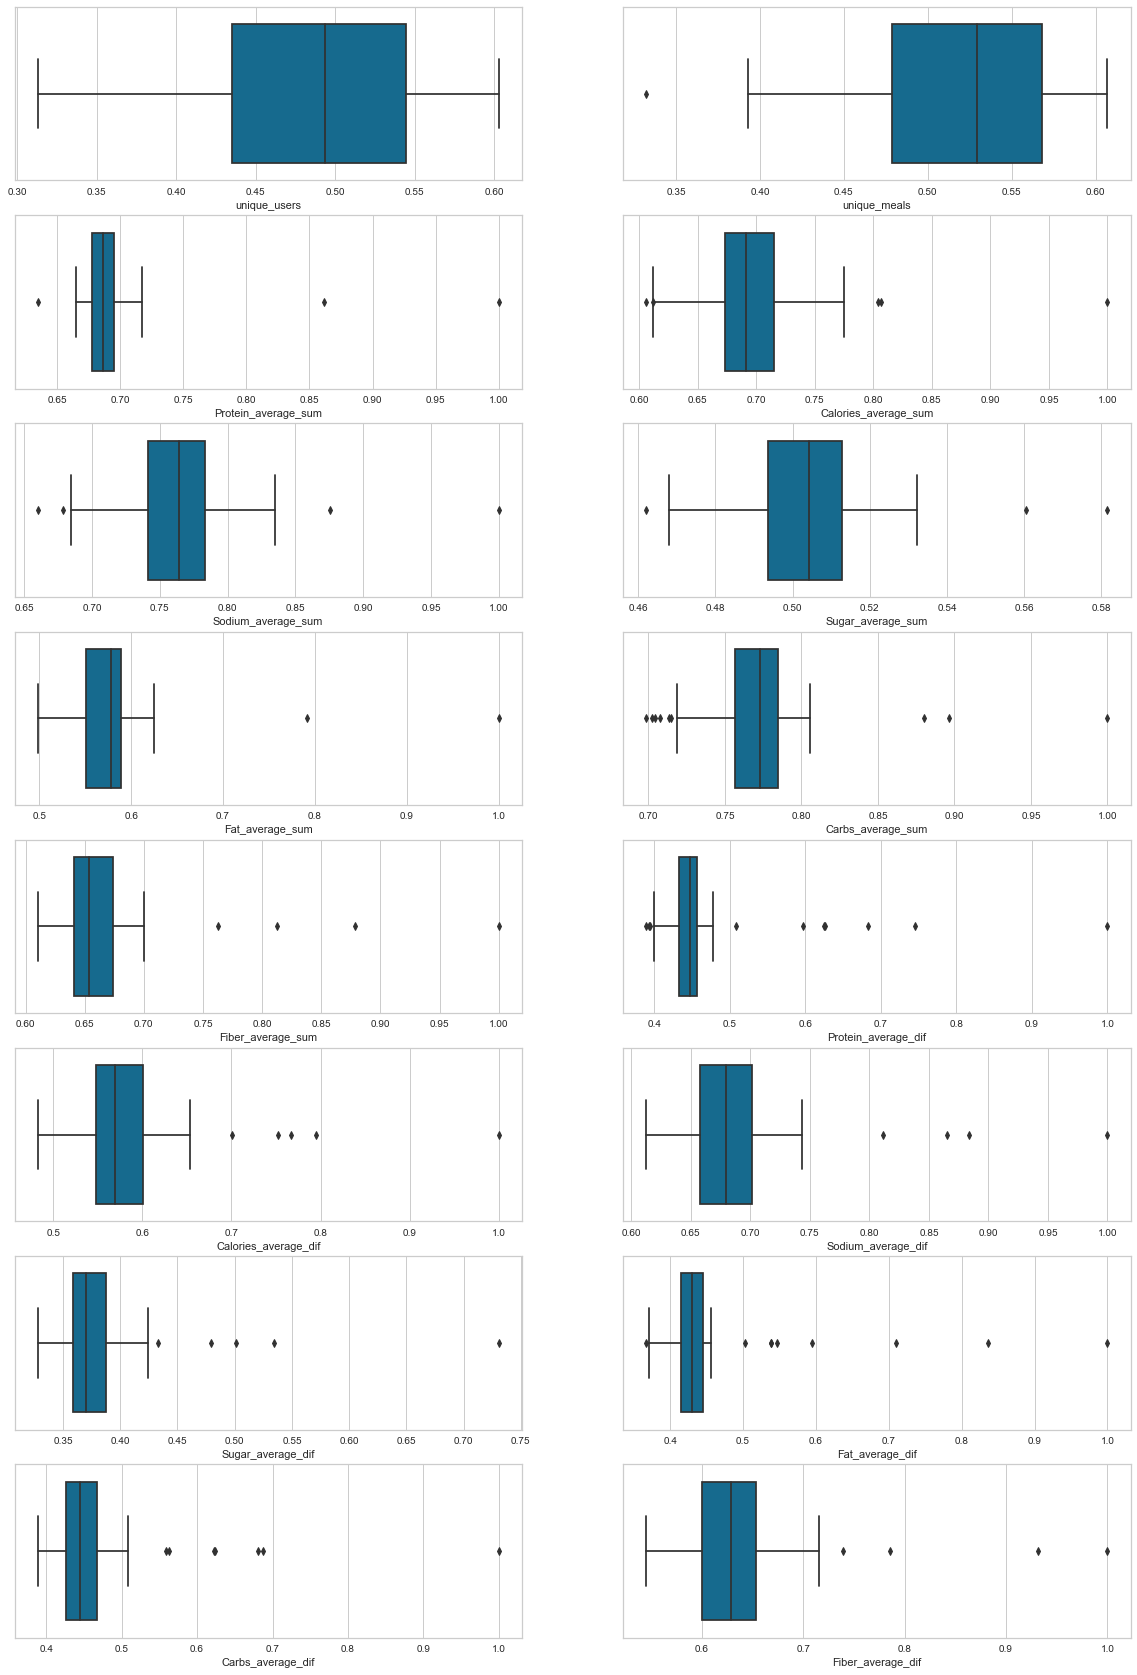

In [17]:
boxplots(numerical_data.loc[clusters[3], :])